## DATA EXPLORATION ANALYSIS

### 1) Data overview 

### 2) KPI metrics 
    - DAU (daily active user)
    - MAU (month active user)
    - ARPU 
    - ARPPU
    - Retention 
    - Transaction rate 

### 3) Insights 
    - Trend
    - Issue of data 


In [3]:
cd ../../

/Users/jerryliu/analysis


In [1]:
import pandas as pd 
from sqlalchemy import create_engine
%matplotlib inline
%pylab inline
import seaborn  as sns 
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


In [75]:
# UDF 
def get_db_data(sql):
    try:
        engine = create_engine('sqlite:///data/war_data.db', echo=False)
        print (sql)
        df = pd.read_sql(sql, engine)
        return df
    except Exception as e:
        print ('query data failed', str(e))
    
def get_date(timestamp):
    return timestamp[:10]

def get_hour(timestamp):
    return timestamp[11:13]

In [5]:
# get data 
engine = create_engine('sqlite:///data/war_data.db', echo=False)
sql_session = "select * from session;"
df_session = pd.read_sql(sql_session, engine)
sql_battle = "select * from battle;"
df_battle = pd.read_sql(sql_battle, engine)
sql_cost = "select * from cost;"
df_cost = pd.read_sql(sql_cost, engine)

## 1) DATA overview

## 2) KPI metric

### 2-1) DAU : user that login/access/view/pay/play game on the APP per day 

In [6]:
# DAU : user that login/access/view/pay/play game on the APP per day 

sql_dau = """
select substr(event_timestamp,1, 10) AS date,
count(distinct user_id) as user_count
from session
group by 1 order by 1;"""
df_dau = get_db_data(sql_dau)


select substr(event_timestamp,1, 10) AS date,
count(distinct user_id) as user_count
from session
group by 1 order by 1;


In [7]:
df_dau.T

,0,1,2,3,4,5,6,7,8,9,...,338,339,340,341,342,343,344,345,346,347
date,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,...,2018-12-05,2018-12-06,2018-12-07,2018-12-08,2018-12-09,2018-12-10,2018-12-11,2018-12-12,2018-12-13,2018-12-14
user_count,5,7,9,15,19,20,21,26,20,18,...,18,23,23,23,19,13,9,4,1,1


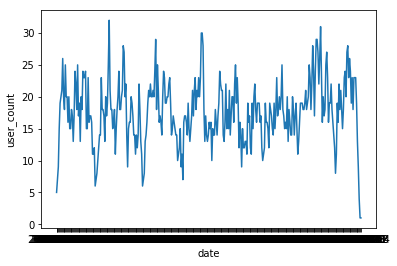

In [20]:
sns.lineplot(x="date", 
             y="user_count",
             data=df_dau)
plt.show()

### 2-2) ARPU  : Average revenue per user 

In [8]:
# ARPU : Average revenue per user

sql_arpu = """

with dau as (
select substr(event_timestamp,1, 10) AS date,
count(distinct user_id) as user_count
from session
group by 1),
revenue as ( 
select substr(event_timestamp,1, 10) AS date,
sum(usd_cost) as day_revenue
from cost
group by 1)
select 
dau.date,
revenue.day_revenue/dau.user_count as arpu
from dau
left join revenue on revenue.date = dau.date;

"""
df_arpu = get_db_data(sql_arpu)



with dau as (
select substr(event_timestamp,1, 10) AS date,
count(distinct user_id) as user_count
from session
group by 1),
revenue as ( 
select substr(event_timestamp,1, 10) AS date,
sum(usd_cost) as day_revenue
from cost
group by 1)
select 
dau.date,
revenue.day_revenue/dau.user_count as arpu
from dau
left join revenue on revenue.date = dau.date;




In [9]:
df_arpu.T

,0,1,2,3,4,5,6,7,8,9,...,338,339,340,341,342,343,344,345,346,347
date,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,...,2018-12-05,2018-12-06,2018-12-07,2018-12-08,2018-12-09,2018-12-10,2018-12-11,2018-12-12,2018-12-13,2018-12-14
arpu,NaN,NaN,1.11,4.13333,NaN,NaN,0.190476,0.346154,NaN,0.776667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2-3) ARPPU : Average revenue per pay user

In [10]:
df_session.head(3)

,index,client_version,event_name,event_timestamp,is_premium,login_attempt_id,platform,player_name,server_version,session_id,user_device_country,user_id,user_ip,user_is_spender,user_server_region,user_type
0,0,1.3.0,session_started,2018-03-01 07:10:48.499895,0,89c571bd-16de-4785-a051-f10aa27d54fa,IOS_MOBILE,luskfmpg,0.1.220,82e80eb5-42cd-4ed7-92c7-6e280f7bbcf1,US,85dff3d5-6f56-4601-9a24-400624f9a024,253.122.152.86,0,US,PLAYER
1,1,1.3.0,session_started,2018-05-01 13:58:47.838814,0,7ff39fa8-819c-4553-8cd0-4b000d338191,IOS_TABLET,myggq,0.1.220,0b76d245-a586-4b0c-a405-3dd09f255a65,US,0c91ed1d-40cc-419a-bd28-7a371e191f70,38.192.175.54,0,US,PLAYER
2,2,1.3.0,session_started,2018-09-29 22:42:47,0,d7c3b9fe-2464-45b2-90c8-825d3bb08335,IOS_TABLET,xuaushlwm,0.1.220,bfc766f4-ed5c-41a8-b887-f11378b3e483,US,d0c8f5e2-2f19-42dc-b279-0d7420ba90a2,89.252.254.157,0,EU,PLAYER


In [11]:
df_cost.head(3)

,index,client_version,event_name,event_timestamp,is_premium,platform,player_name,product_name,real_currency_amount,real_currency_type,server_version,usd_cost,user_device_country,user_id,user_ip,user_is_spender,user_server_region,user_type
0,0,1.3.0,in_app_purchase_log_server,2018-10-25 08:24:27.164771,0,IOS_MOBILE,woiogu,gems_medium,9.99,USD,0.1.220,9.99,US,387e9319-0322-4aa7-bd1b-849ec4549236,85.185.154.2,1,US,PLAYER
1,1,1.3.0,in_app_purchase_log_server,2018-09-06 13:53:43.766954,0,IOS_MOBILE,mfyqqump,gems_small,4.99,USD,0.1.220,4.99,US,104865e8-b05c-43d4-91e0-9cd47eb4e336,68.141.250.207,1,US,PLAYER
2,2,1.3.0,in_app_purchase_log_server,2018-04-26 19:40:38.635197,0,IOS_MOBILE,ksebgpggrxi,gems_large,"49,99",EUR,0.1.220,"49,99",US,ce4ec61d-f1ff-4ac6-bad4-fd402242b8f3,218.132.111.36,1,EU,PLAYER


In [17]:
# ARPPU : Average revenue per pay user

sql_arppu = """

with day_pay_user as (
select substr(event_timestamp,1, 10) AS date,
count(distinct user_id) as user_count
from cost
group by 1),
revenue as ( 
select substr(event_timestamp,1, 10) AS date,
sum(usd_cost) as day_revenue
from cost
group by 1)
select 
day_pay_user.date,
revenue.day_revenue/day_pay_user.user_count as arppu
from day_pay_user
left join revenue on revenue.date = day_pay_user.date;

"""
df_arppu = get_db_data(sql_arppu)



with day_pay_user as (
select substr(event_timestamp,1, 10) AS date,
count(distinct user_id) as user_count
from cost
group by 1),
revenue as ( 
select substr(event_timestamp,1, 10) AS date,
sum(usd_cost) as day_revenue
from cost
group by 1)
select 
day_pay_user.date,
revenue.day_revenue/day_pay_user.user_count as arppu
from day_pay_user
left join revenue on revenue.date = day_pay_user.date;




In [18]:
df_arpu.T

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
date,2018-01-03,2018-01-04,2018-01-07,2018-01-08,2018-01-10,2018-01-11,2018-01-17,2018-01-18,2018-01-21,2018-01-23,...,2018-10-27,2018-10-28,2018-11-04,2018-11-10,2018-11-12,2018-11-18,2018-11-21,2018-12-01,2018-12-02,2018-12-04
arppu,9.99,62,4,9,6.99,4.99,4.99,9.99,8.495,18,...,4.99,9.99,4,4,18,9.99,13,4,49.99,9


## 3) Insight

### 3-1) Trend : battle 

In [85]:
df_battle.platform.value_counts()

IOS_TABLET        8482
ANDROID_MOBILE    8419
IOS_MOBILE        6986
Name: platform, dtype: int64

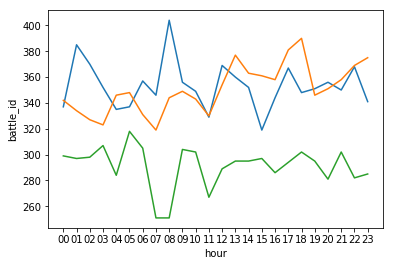

In [86]:
df_battle_ = df_battle[df_battle.platform=='IOS_TABLET']
df_IOS_TABLET_battle_count = df_battle_.groupby('hour').count()['battle_id'].reset_index()

df_battle_ = df_battle[df_battle.platform=='ANDROID_MOBILE']
df_ANDROID_MOBILE_battle_count = df_battle_.groupby('hour').count()['battle_id'].reset_index()

df_battle_ = df_battle[df_battle.platform=='IOS_MOBILE']
df_IOS_MOBILE_battle_count = df_battle_.groupby('hour').count()['battle_id'].reset_index()
  
    
sns.lineplot(x="hour", 
             y="battle_id",
             data=df_IOS_TABLET_battle_count)

sns.lineplot(x="hour", 
             y="battle_id",
             data=df_ANDROID_MOBILE_battle_count)

sns.lineplot(x="hour", 
             y="battle_id",
             data=df_IOS_MOBILE_battle_count)
plt.show()